In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Fetching the Data
##### Using Pandas to load the dataset into this notebook. Using pandas we can read our datafile (car data.csv) with the line below. Data-set loaded will be assigned to the variable vehicles.



In [303]:
car=pd.read_csv('car data.csv')

## Check out the Data
##### We will run some exploratory analysis on our cardekho dataset now that it is loaded in the vehicles variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features. Let's Begin!



In [304]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 ###### Looking at the above 5 rows of data we need to develop an understanding of every column to efficiently continue exploring the dataset further. We need to have a clear understanding of every feature defined in the data-set and what it is trying to convey!



In [305]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Above is a concise summary of our dataframe printing columns' data-type,index data-type and number of non-null values !



In [306]:
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Exploratory Data Analysis(EDA)
Let's create some simple plots to check out the data!



## Visualizing the categorical data :


In [307]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [308]:
car.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

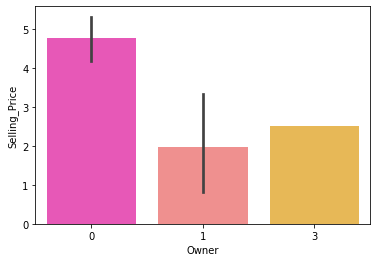

In [309]:
sns.barplot(x='Owner',y='Selling_Price',data=car,palette='spring')

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

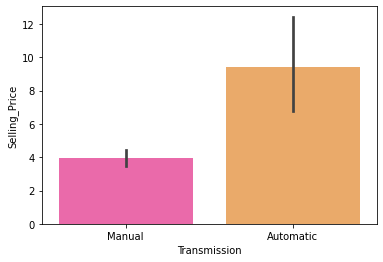

In [310]:
sns.barplot(x='Transmission',y='Selling_Price',data=car,palette='spring')

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

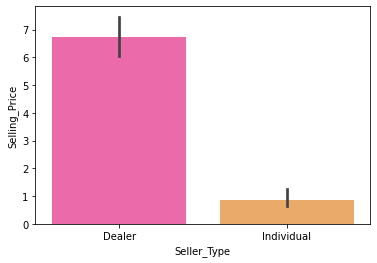

In [311]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=car,palette='spring')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

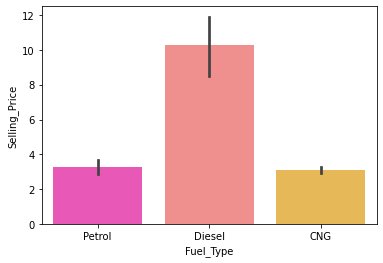

In [312]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car,palette='spring')

#### relation between Kms_Driven and target (selling price)

scaling KMS_Driven

In [313]:
car['scaled_Kms_Driven']=car.Kms_Driven.apply(lambda x : x/(np.max(car.Kms_Driven) - np.min(car.Kms_Driven)))

In [314]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,scaled_Kms_Driven
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.054054
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.086086
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.013814
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.010410
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.084985


Text(0.5, 1.0, 'NOT Scaled')

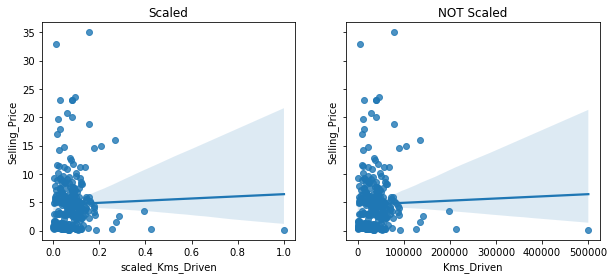

In [315]:
fig , ax =plt.subplots(1,2,figsize=(10,4),sharey=True)
sns.regplot(x='scaled_Kms_Driven' , y='Selling_Price',data=car ,ax=ax[0])
sns.regplot(x='Kms_Driven' , y='Selling_Price',data=car ,ax=ax[1])
ax[0].set_title('Scaled')
ax[1].set_title('NOT Scaled')

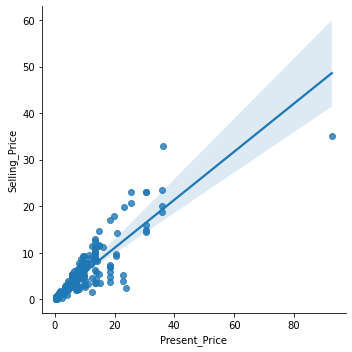

In [316]:
sns.lmplot(x='Present_Price' , y='Selling_Price',data=car )


## car age

In [317]:
from datetime import date
year_now = date.today().year
year_now

2022

In [318]:
car['age']=car.Year.apply(lambda x : year_now - x)

In [319]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,scaled_Kms_Driven,age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.054054,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.086086,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.013814,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.010410,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.084985,8


<AxesSubplot:xlabel='age', ylabel='Selling_Price'>

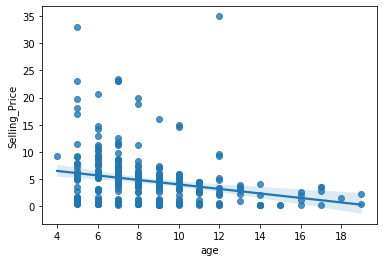

In [320]:
sns.regplot(x='age',y='Selling_Price',data=car)

## Feature Engineering

In [321]:
cat_col=['Fuel_Type','Seller_Type','Transmission']

In [322]:
car =pd.get_dummies(car,columns=cat_col,drop_first=True)

In [323]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,scaled_Kms_Driven,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0.054054,8,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,0.086086,9,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0.013814,5,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0.010410,11,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,0.084985,8,1,0,0,1


Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer and '0' Seller_Type_Individual.


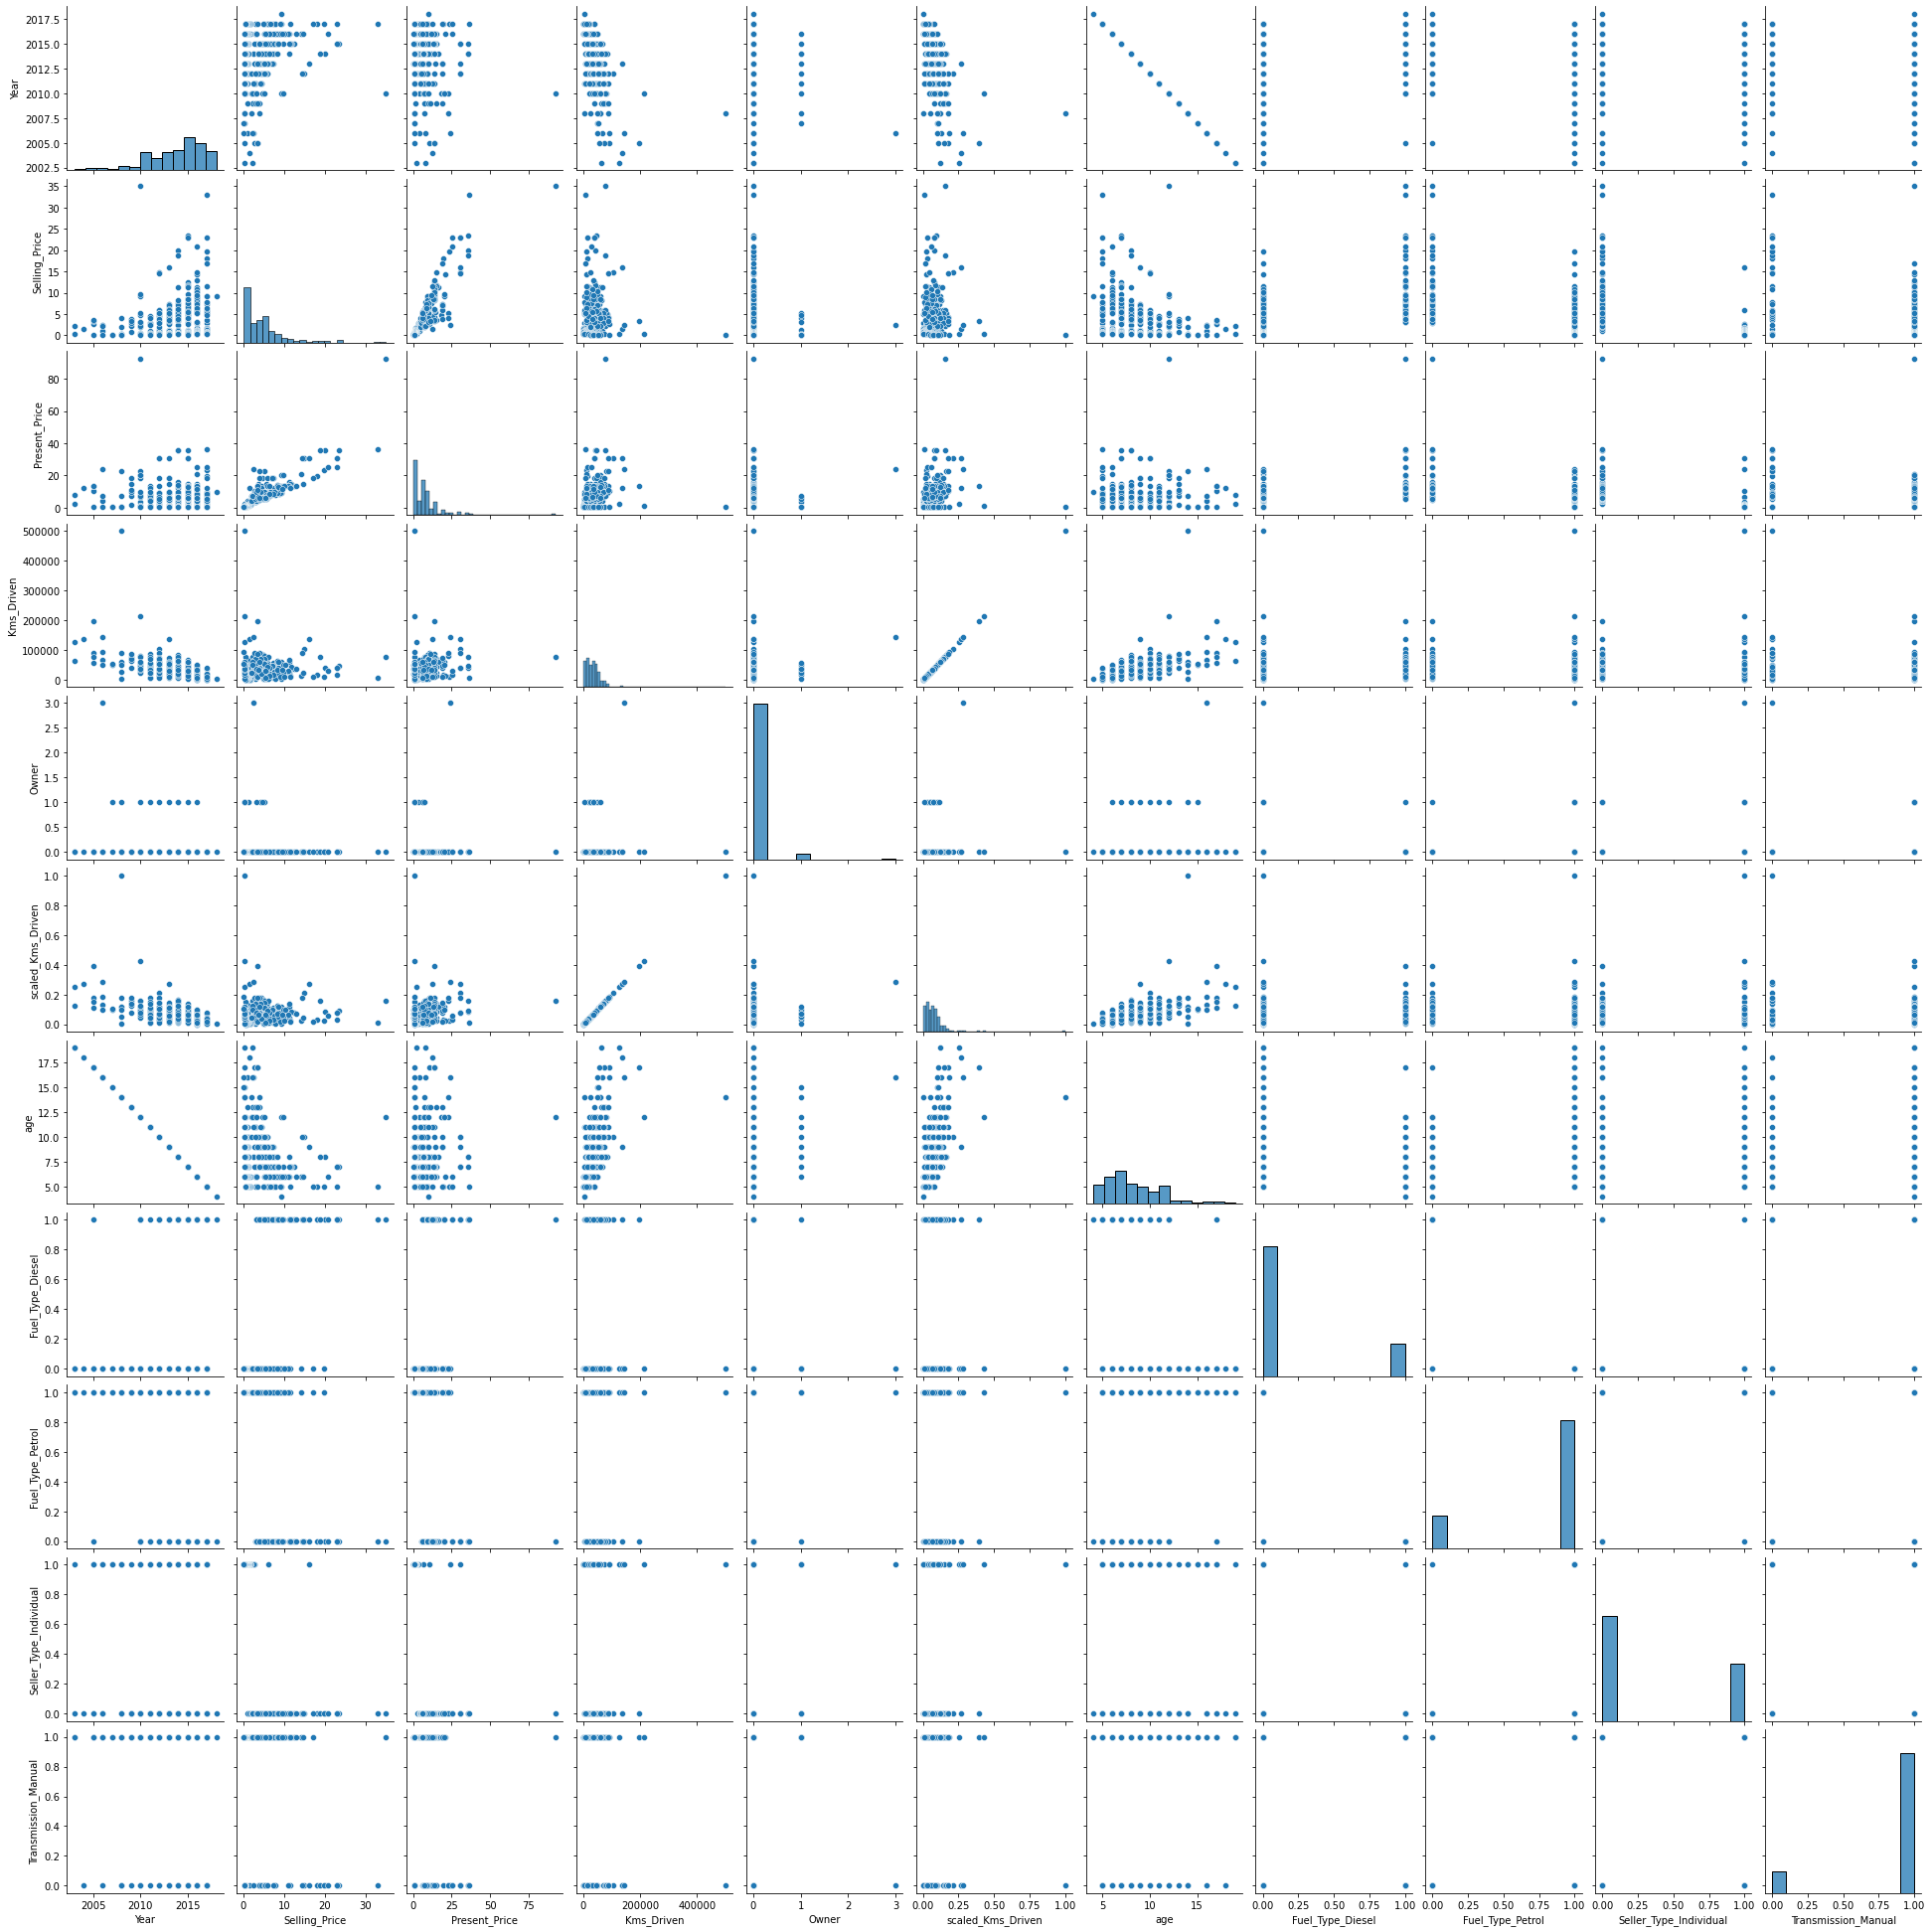

In [324]:
sns.pairplot(car)

The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.
Selling price seems to be considerably correlated with the Present Price feature.


## Correlation HeatMap

<AxesSubplot:>

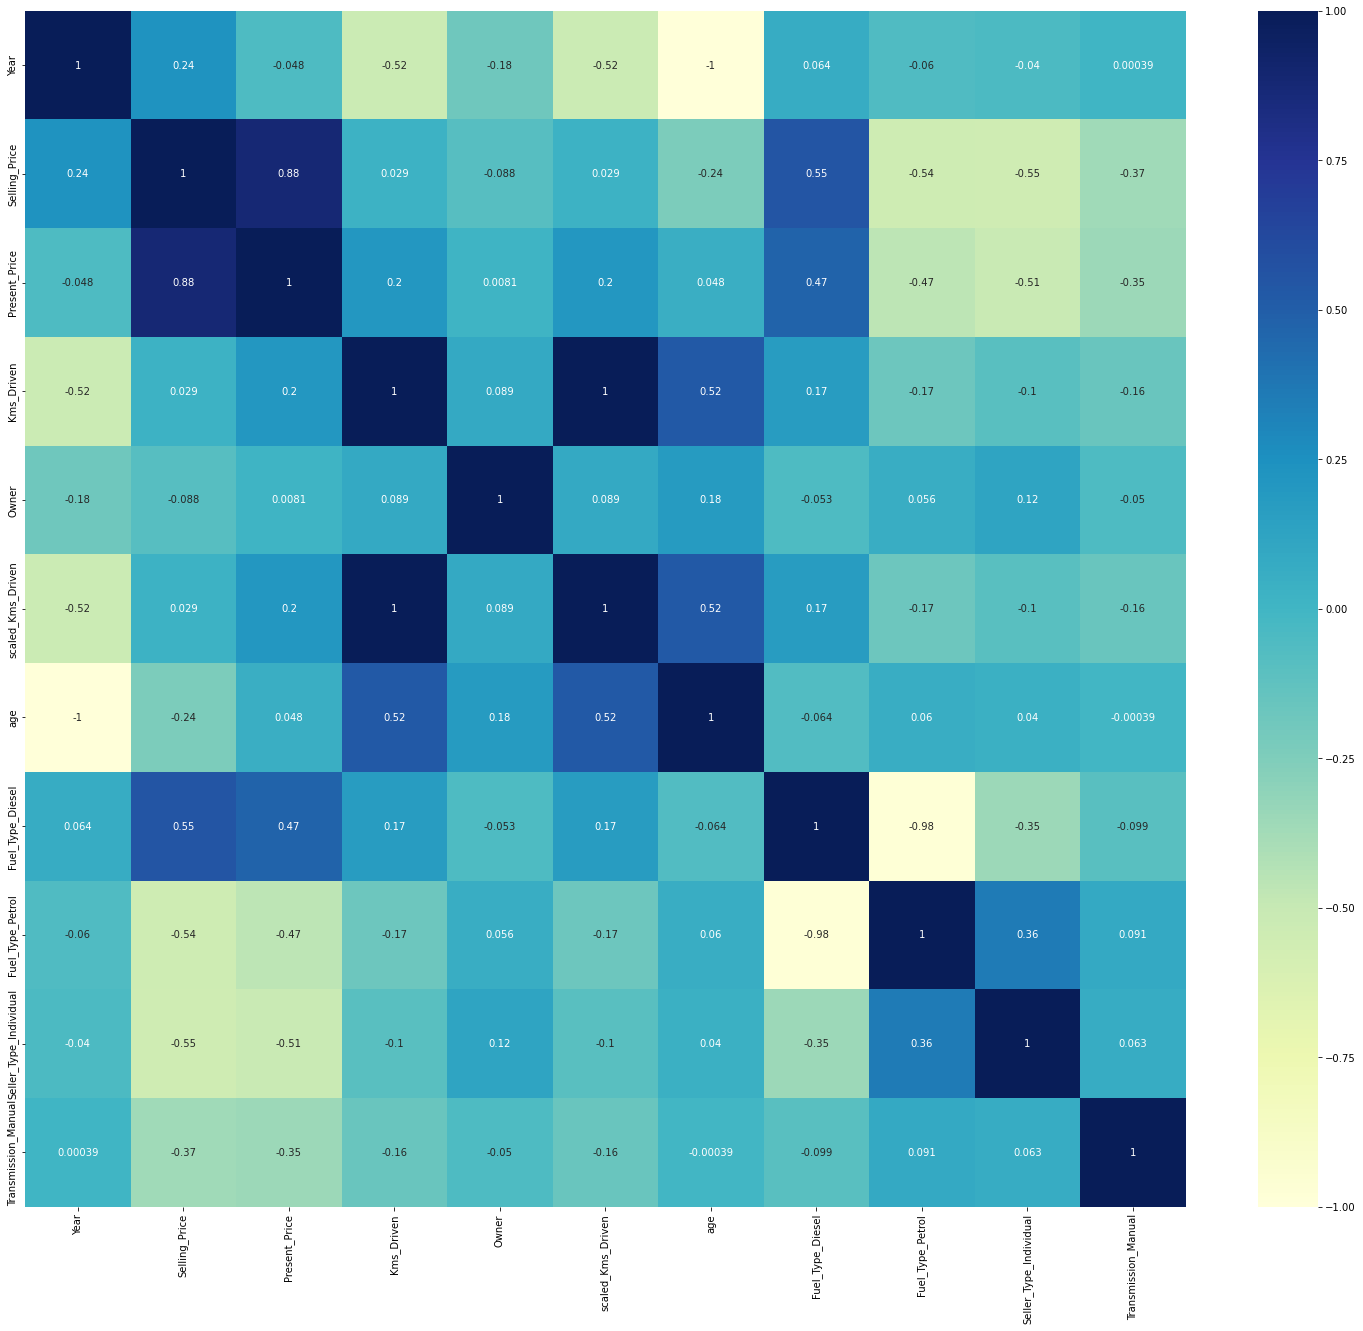

In [325]:
corr =car.corr()
index =corr.index
plt.figure(figsize=(26,22))
sns.heatmap(car[index].corr(),annot=True,cmap='YlGnBu')

## Training our Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

## 1. Train Test Split


In [326]:
car.drop(columns=['Car_Name','Year','scaled_Kms_Driven'],inplace=True)

In [327]:

from sklearn.model_selection import train_test_split
car_train , car_test = train_test_split(car,test_size=0.3,train_size=0.7,random_state=0)
from sklearn.preprocessing import StandardScaler

In [383]:
scaler= StandardScaler()

fet = ['Selling_Price','Present_Price','Kms_Driven','age']
car_train[fet] =scaler.fit_transform(car_train[fet])
car_test[fet] =scaler.fit_transform(car_test[fet])

y_test =car_test['Selling_Price']
X_test=car_test.drop(columns=['Selling_Price'],axis=1)

y_train =car_train['Selling_Price']
X_train=car_train.drop(columns=['Selling_Price'],axis=1)


In [403]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [416]:
pred =lm.predict(X_test)

print('MAE:', metrics.mean_squared_error(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MAE:', metrics.r2_score(y_test, pred))

X_test

MAE: 0.1258894116324713
MAE: 0.2591258689133907
MAE: 0.8741105883675286


,Present_Price,Kms_Driven,Owner,age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,0.242152,0.907397,0,-0.426644,1,0,0,1
150,-0.941631,-0.942963,0,1.024742,0,1,1,1
226,-0.268694,-0.318904,0,-0.426644,0,1,0,1
296,0.545899,-0.007843,0,-0.789490,1,0,0,1
52,1.673903,-0.642260,0,-1.152337,1,0,0,0
...,...,...,...,...,...,...,...,...
240,0.242152,-0.063506,0,0.661896,1,0,0,1
76,0.971144,1.262193,0,0.299049,0,1,0,1
145,-0.943840,-0.508614,0,0.661896,0,1,1,1
300,-0.241081,-0.960871,0,-0.789490,0,1,0,1


In [430]:

x=np.array(X_test.iloc[0])
y=x.reshape(1,-1)
lm.predict(y)

/home/sameh/mambaforge/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.64226803])

In [429]:
print(y_test.iloc[0])

0.5709273358822596
